In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
df = pd.read_csv('House_Rent_Dataset.csv')
print(df.shape)
df.head()

(4746, 12)


Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Columns description
**BHK**: Number of Bedrooms, Hall, Kitchen.

**Rent**: Rent of the Houses/Apartments/Flats.

**Size** : Size of the Houses/Apartments/Flats in Square Feet.

**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality**: Locality of the Houses/Apartments/Flats.

**City**: City where the Houses/Apartments/Flats are Located.

**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

**Bathroom**: Number of Bathrooms.

**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [5]:
#Checking if there's any missing values
print(df.isna().sum(),"\n")
print(df.isnull().sum(),"\n")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
df.drop_duplicates(inplace=True)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64 

Posted On: 81 unique values
BHK: 6 unique values
Rent: 243 unique values
Size: 615 unique values
Floor: 480 unique values
Area Type: 3 unique values
Area Locality: 2235 unique values
City: 6 unique values
Furnishing Status: 3 unique values
Tenant Preferred: 3 unique values
Bathroom: 8 unique values
Point of Contact: 3 unique values


In [6]:
#Exploring the floor column
print(df['Floor'].unique()[:30])
df['Floor'].unique().max(),df['Floor'].unique().min()
# Bear in mind that the number of words is different

['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2']


('Upper Basement out of 9', '1')

In [7]:
def find_Floor_Number(name):
    if name=="Ground":
        return 0
    elif name=="Upper Basement":
        return -1
    elif name=="Lower Basement":
        return -2
    else: return int(name)
def find_floor(name):
    '''
        Ground out of...
        (Lower and Upper) Basement out of...
        2 out of ...
        1
        
        Only in case of basement and number we return the 
        first element of list, but in case of these arrays which 
        after split(" ") will have length 1, it is better to use
        try,except structure
    '''
    name = name.split(" ")
    try:
        if(name[1]=="Basement"): 
            return find_Floor_Number(" ".join(name[:2]))
        else: return find_Floor_Number(name[0])
    except:
        return find_Floor_Number(name[0])
df["Floor Number"] = df["Floor"].apply(find_floor)
df = df.drop(columns=['Floor'])
print(df["Floor Number"].describe())
df.info()

count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor Number, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  Floor Number       4746 non-null   int64 
dtypes: int64(5), object(7)
memo

Now let's modify date column to set apart months from 'Posted On' column which will come in handy later on in the analysis.

In [8]:
df['Month Number'] = pd.to_datetime(df['Posted On'],format='%Y-%m-%d').dt.month
map_month = {4:"April",5:"May",6:"June",7:"July",8:"August"}
df['Month'] = df['Month Number'].map(map_month)
df['Month'].unique()

array(['May', 'July', 'April', 'June'], dtype=object)

In [9]:
# sns.pairplot(df)


### Rent distribution


count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

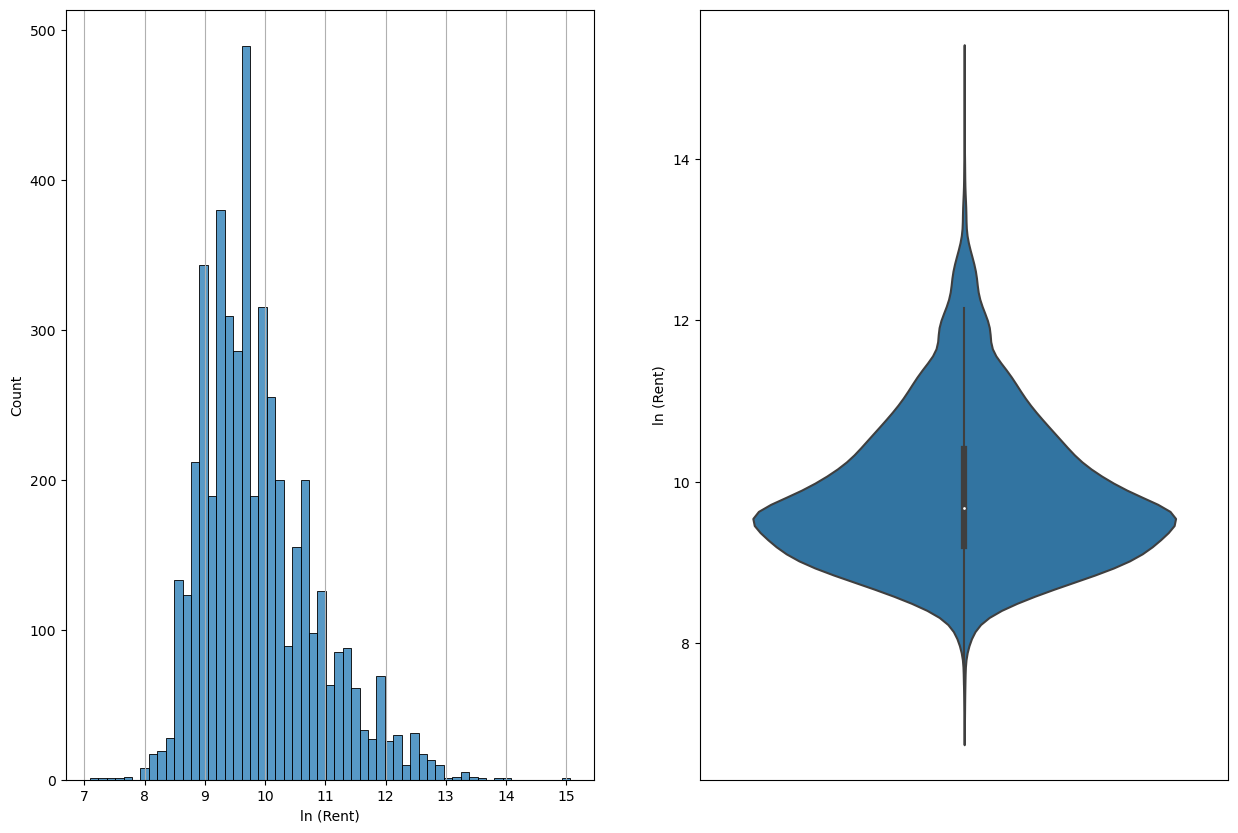

In [10]:
fig,ax = plt.subplots(figsize=(15,10),ncols=2)
ax[0].grid(axis='x')
ax[0].set_xlabel("ln (Rent)")
data = df["Rent"]
sns.histplot(np.log(data),ax=ax[0])
# sns.lineplot(np.log(data))
sns.violinplot(np.log(data),ax=ax[1])
ax[1].set_ylabel("ln (Rent)")
ax[1].set_xticks([])
data.describe()
# plt.gcf().set_facecolor('#e6f1f1')


* I decided to use log function in order to reduce impact of substancial outliers which are in the Rent column.
* As we can see the rent columnn has a bit of positive skew.

### Dates distribution

     Month   Rent
0      May  10000
1      May  20000
2      May  17000
3     July  10000
4      May   7500
...    ...    ...
4741   May  15000
4742   May  29000
4743  July  35000
4744  July  45000
4745   May  15000

[4746 rows x 2 columns]
                  Size  Month Number      Rent  Floor Number
Size          1.000000      0.138213  0.413551      0.169229
Month Number  0.138213      1.000000  0.101925      0.148358
Rent          0.413551      0.101925  1.000000      0.326200
Floor Number  0.169229      0.148358  0.326200      1.000000


Size          Rent  Floor Number
Month Number                                         
4              770.035088  19070.504386      2.135965
5              906.581202  27556.183819      2.773349
6              964.054330  37387.461001      3.293168
7             1124.747444  46938.251534      5.150307

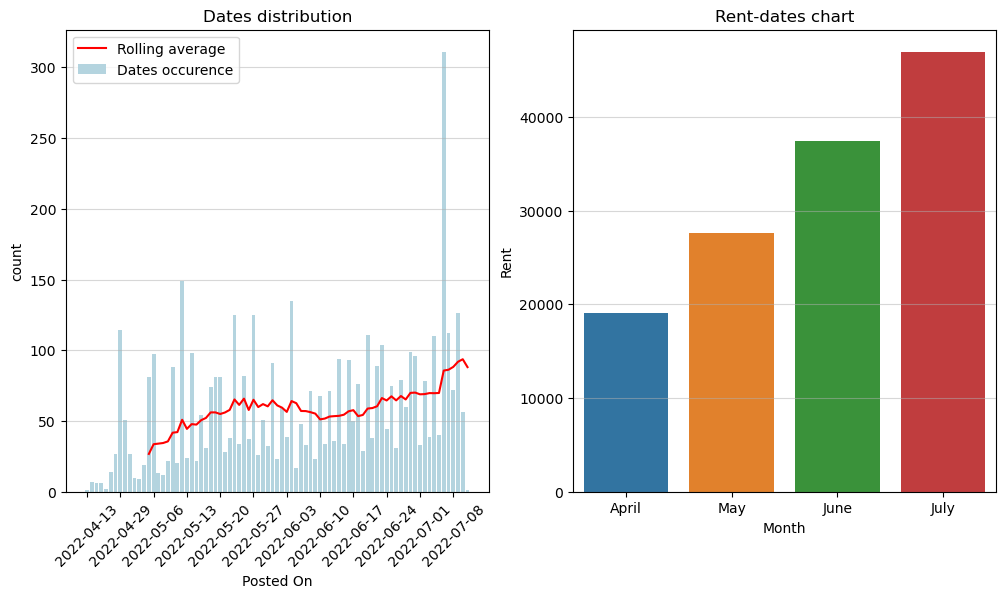

In [11]:
# sns.set_style("whitegrid")

fig,axes = plt.subplots(figsize=(12,6),ncols=2)



data = df['Posted On'].value_counts().sort_index()
ax = sns.barplot(x=data.index,y=data,
                color='lightblue',label="Dates occurence",ax=axes[0])
ax1 = sns.lineplot(x=data.index,y=data.rolling(14).mean(),
                color='red',zorder=999,label="Rolling average",ax=axes[0])
ax1.tick_params(axis='x',rotation=90)
ax1.set_title("Dates distribution")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y',alpha=0.5)
ax1.set_xticks(
            ticks=range(0, len(data),7)
            )


data = df[['Month','Rent']]
month_order = ['April', 'May', 'June', 'July']
print(data)
ax2 = sns.barplot(x=data['Month'],y=data['Rent'],ax=axes[1],order=month_order,errorbar=None)
ax2.grid(axis='y',alpha=0.5)
ax2.set_title("Rent-dates chart")
print(df[['Size','Month Number','Rent','Floor Number']].corr())
df[['Size','Month Number','Rent','Floor Number']].groupby(by="Month Number").mean()

* Listings posted remained relatively consistent across our dataset, regardless of the date. However when rolling average of last 14 days is applied we can conclude that there are slightly more postings over time.
* There's high, positive correlation between the time and the rent. The further we go, the costlier listings appear to be, which might be related to a fact that the size of average flat also increases over time
* Given that and the fact that Month number column is barely correlated with target variable rent, I'm going to drop this column

In [12]:
df.drop(columns=['Month Number'],inplace=True)

### Floors

3.436156763590392 5.7733412997914355
count    4746.000000
mean        3.436157
std         5.773950
min        -2.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        76.000000
Name: Floor Number, dtype: float64


Rent  Floor Number
Rent          1.0000        0.3262
Floor Number  0.3262        1.0000

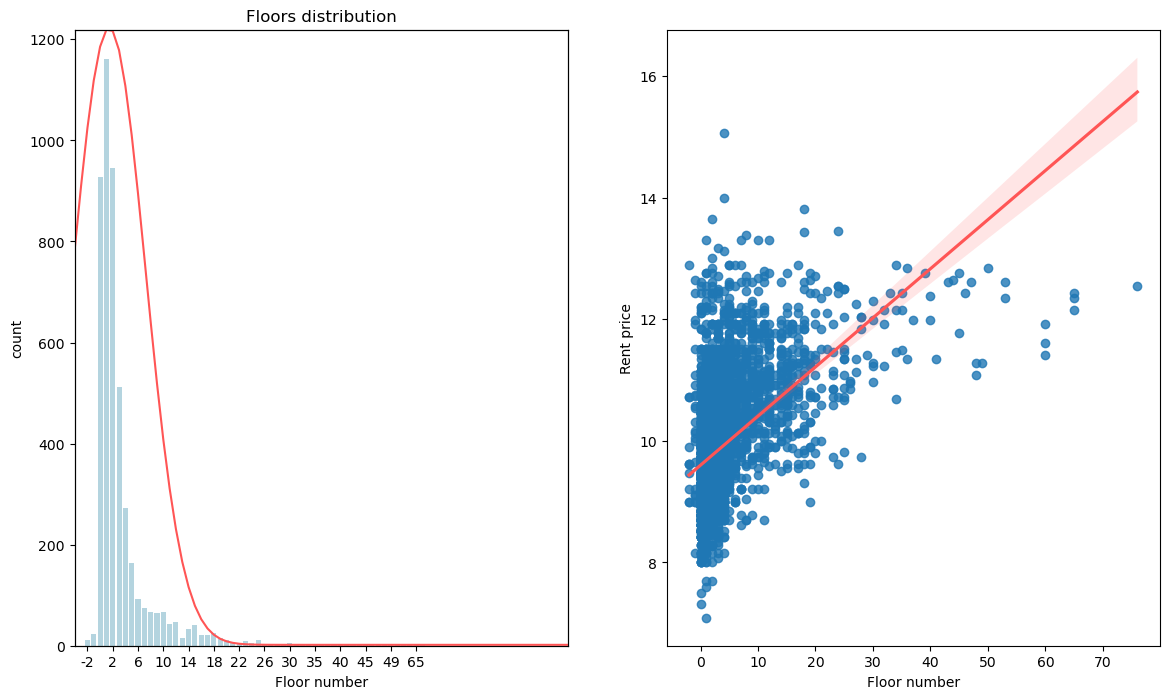

In [13]:
#Floors
from scipy.stats import norm

fig,axes = plt.subplots(figsize=(14,8),ncols=2,nrows=1)
ax1 = axes[0]
data = df['Floor Number'].value_counts().sort_index()
x=data.index
max_floors = data.idxmax()
num_of_floors = data.max()
sns.barplot(x=x,y=data,ax=ax1,color='lightblue')
ax1.set_title("Floors distribution")
ax1.set_xlabel("Floor number")
ax1.set_xticks(
            ticks=range(0, len(data),4)
            )
ax1.set_xlim([min(data.index),max(data.index)])
ax2 = ax1.twinx()
ax2.set_yticks([])
mean = np.mean(df['Floor Number'])
std = np.std(df['Floor Number'])
p = norm.pdf(data.index, mean, std)
ax2.set_ylim([-0.0001,max(p)])
print(mean,std)
sns.lineplot(x=data.index,y=p,ax=ax2,color='#FF5555')

ax2 = axes[1]
data = df
y_data = np.log(data['Rent'])
sns.regplot(x=data['Floor Number'],y=y_data,ax=ax2,line_kws={"color":"#FF5555"}).set_xlabel("Floor number")
ax2.set_ylabel("Rent price")

print(df['Floor Number'].describe())
df[['Rent','Floor Number']].corr()

* Floors -2,-1 refer to basement
* Moderate correlation with Rent column
* Data concentrated mainly in smaller values (25_percentile=1 floor 75_percentile=3 floors) with outliers as high as 76th floor

### Size

8000


Rent      Size
Rent  1.000000  0.388404
Size  0.388404  1.000000

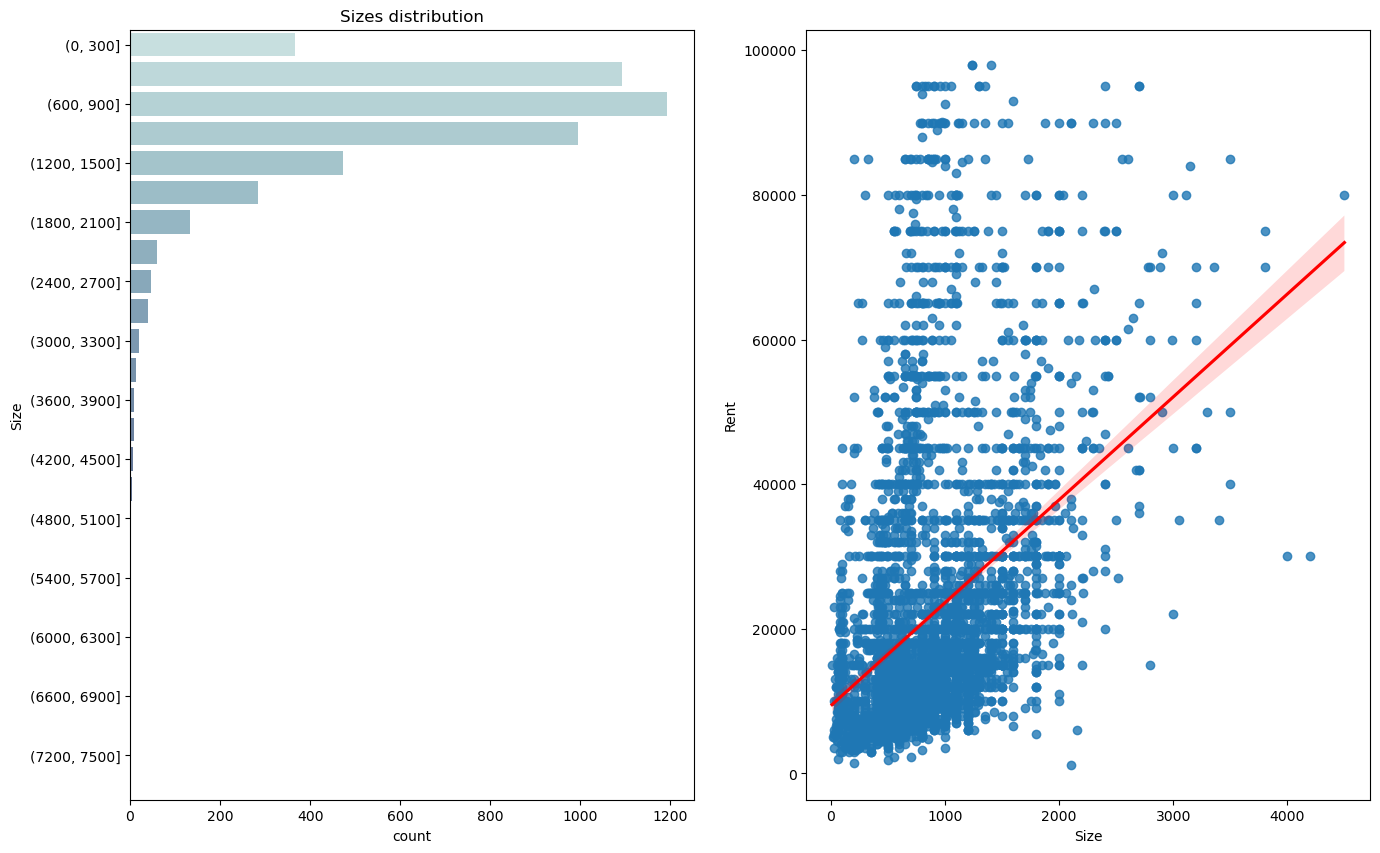

In [14]:
sns.color_palette("deep")
fig,axes = plt.subplots(figsize=(16,10),ncols=2)

ax1 = axes[0]
max_size = df['Size'].max()
print(max_size)
data_binned = pd.cut(df['Size'],bins=np.arange(0,max_size,300)).value_counts().sort_index()
colors = sns.color_palette("ch:start=.2,rot=-.3",len(data_binned))
sns.barplot(x=data_binned, y=data_binned.index,ax=ax1,palette=colors)
ax1.set_yticks(
    ticks=range(0,len(data_binned),2)
)
ax1.set_title("Sizes distribution")

ax2=axes[1]
data = df[df['Rent']<1e5][['Rent','Size']]
sns.regplot(y=data['Rent'],x=data['Size'],line_kws={'color':'red'})
data.corr()

* The highest number of listings falls in the range of 600 to 900.
* Correlation exhibits a slight increase compared to Floor Number column which suggests a stronger dependency between Rent and Size

### Other columns

   BHK  count
0    2   2265
1    1   1167
2    3   1098
3    4    189
4    5     19
5    6      8


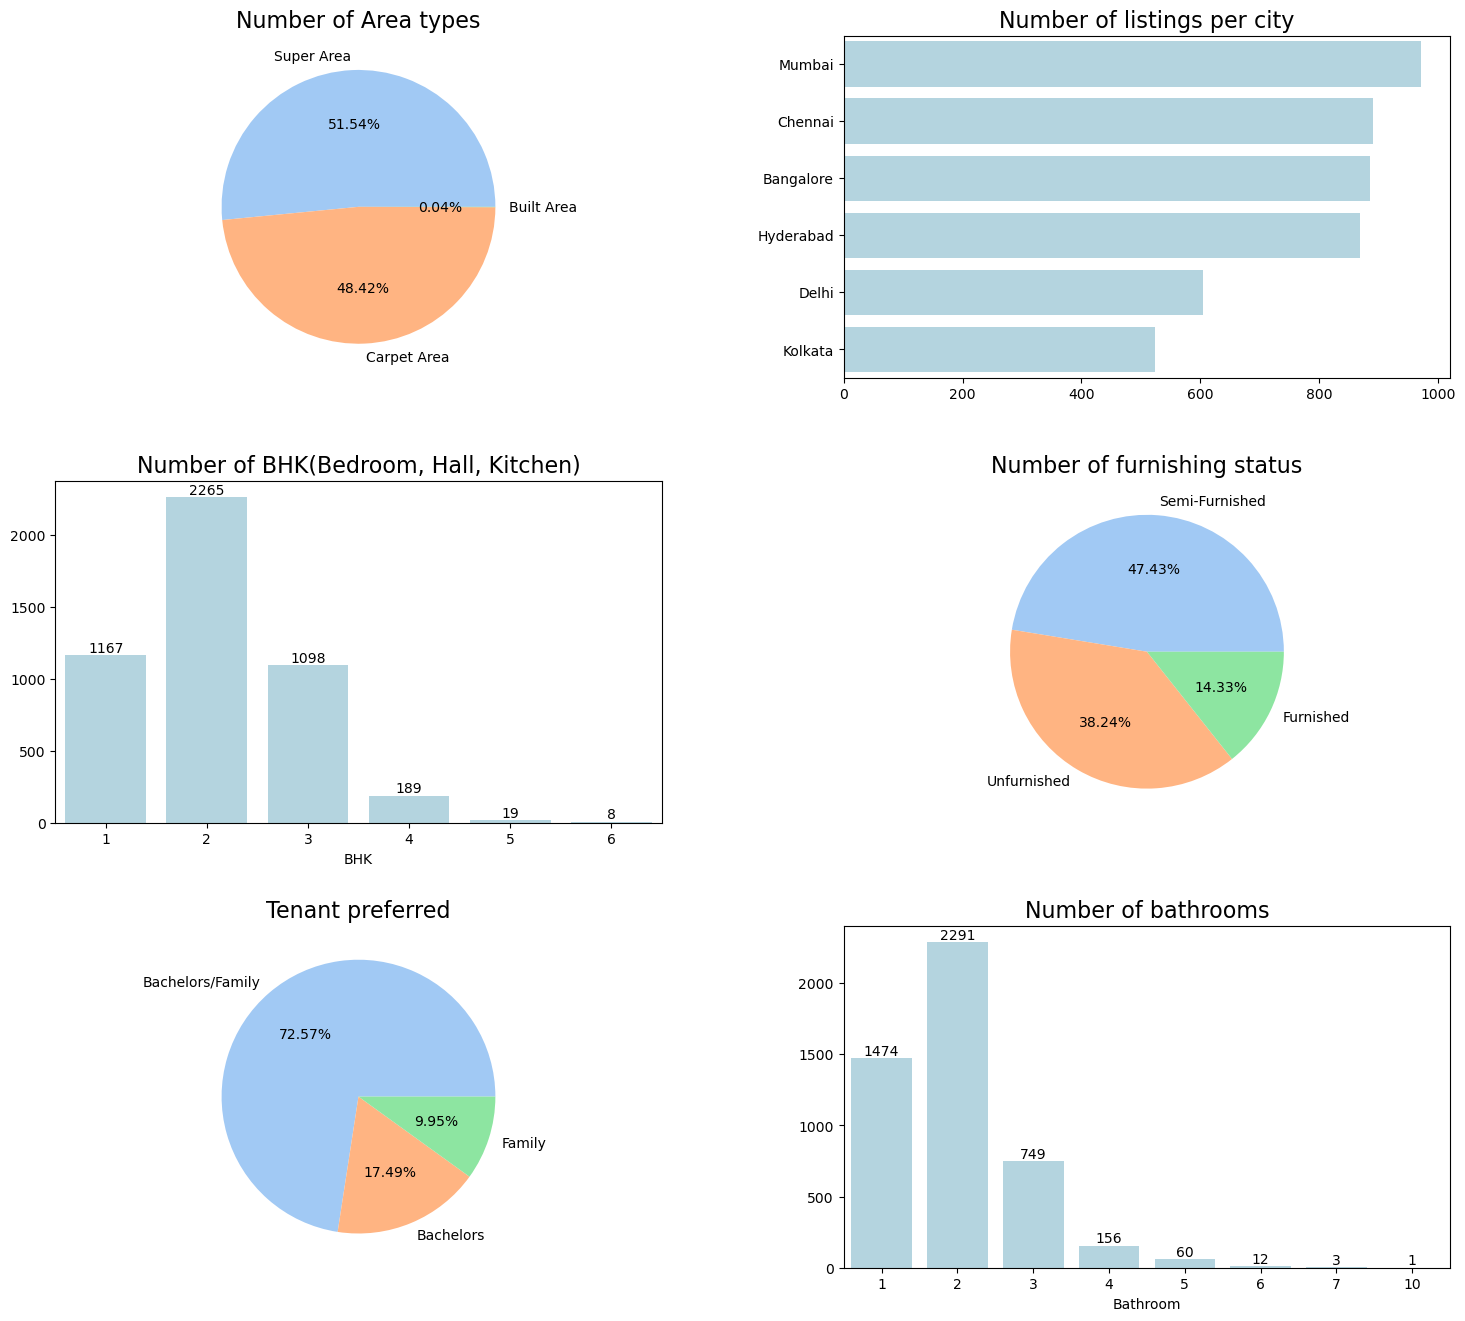

In [15]:

fig,axes = plt.subplots(figsize=(18,16),nrows=3,ncols=2)

ax1 = axes[0, 0]
area_type_counts = df["Area Type"].value_counts()
ax1.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax1.set_title("Number of Area types", fontsize=16)

# Plot for City
ax2 = axes[0, 1]
sns.barplot(x=df["City"].value_counts().values, y=df["City"].value_counts().index, ax=ax2, color='lightblue')
ax2.set_title("Number of listings per city", fontsize=16)

# Plot for BHK
ax3 = axes[1, 0]
data = df["BHK"].value_counts()
sns.barplot(x=data.index, y=data, ax=ax3, color='lightblue')
ax3.set_title("Number of BHK(Bedroom, Hall, Kitchen)", fontsize=16)
data = data.reset_index()
print(data)
for index,row in data.iterrows():
    # print(index,row)
    ax3.text(row['BHK']-1, row['count'] + 20, str(row['count']), ha='center', fontsize=10)

# Plot for Furnishing Status
ax4 = axes[1, 1]
ax4.pie(df["Furnishing Status"].value_counts().values, labels=df["Furnishing Status"].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax4.set_title("Number of furnishing status", fontsize=16)

ax5 = axes[2,0]
data = df['Tenant Preferred'].value_counts()
ax5.pie(data.values,labels=data.index,autopct='%1.2f%%', colors=sns.color_palette("pastel"))
ax5.set_title("Tenant preferred", fontsize=16)

ax6 = axes[2,1]
data = df['Bathroom'].value_counts()
sns.barplot(x=data.index,y=data,color='lightblue',ax=ax6)
ax6.set_title("Number of bathrooms", fontsize=16)
data = data.sort_index().reset_index()
# print(data)
for index,row in data.iterrows():
    # print(index,row)
    ax6.text(index,row['count']+20,row['count'],ha='center', fontsize=10)


for ax_row in axes:
    for ax in ax_row:
        ax.set_ylabel("")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)


* As we can see most of the listings are distributed more or less equally throughout the cities with **most** being in **Mumbai** (number) and the **least** in **Kolkata**
* Majority of area types belongs to super area and carpet area with tiny percentage for built area type.
* Majority of rental properties has 2 BHK 
* Also we should know that only a small fraction of them is said to be fully furnished while the other are either unfurnished or semi-furnished

2


<Axes: xlabel='Size', ylabel='Area Type'>

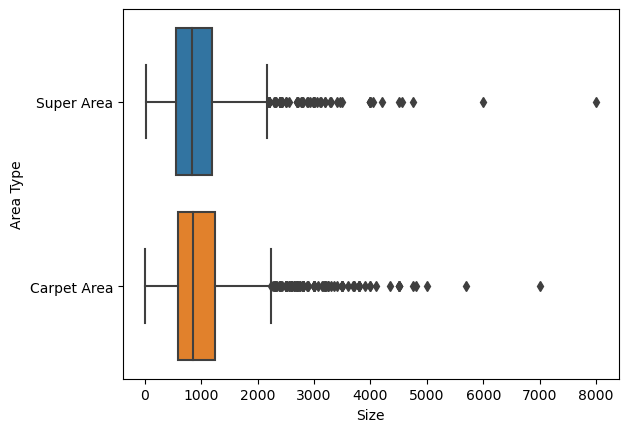

In [16]:
print(df[df['Area Type']=='Built Area'].count()[0])
# There's only two records of built area, therefore i'll neglect this particular area type
df = df[df['Area Type']!='Built Area']
data = df[['Size','Area Type']]
sns.boxplot(x=data['Size'],y=data['Area Type'])

In [17]:
df[df['Rent']>7e5].count()
# For easier visualization I'll skip 4 outliers

Posted On            4
BHK                  4
Rent                 4
Size                 4
Area Type            4
Area Locality        4
City                 4
Furnishing Status    4
Tenant Preferred     4
Bathroom             4
Point of Contact     4
Floor Number         4
Month                4
dtype: int64

City
Mumbai       963
Chennai      889
Bangalore    885
Hyderabad    867
Delhi        605
Kolkata      524
Name: count, dtype: int64

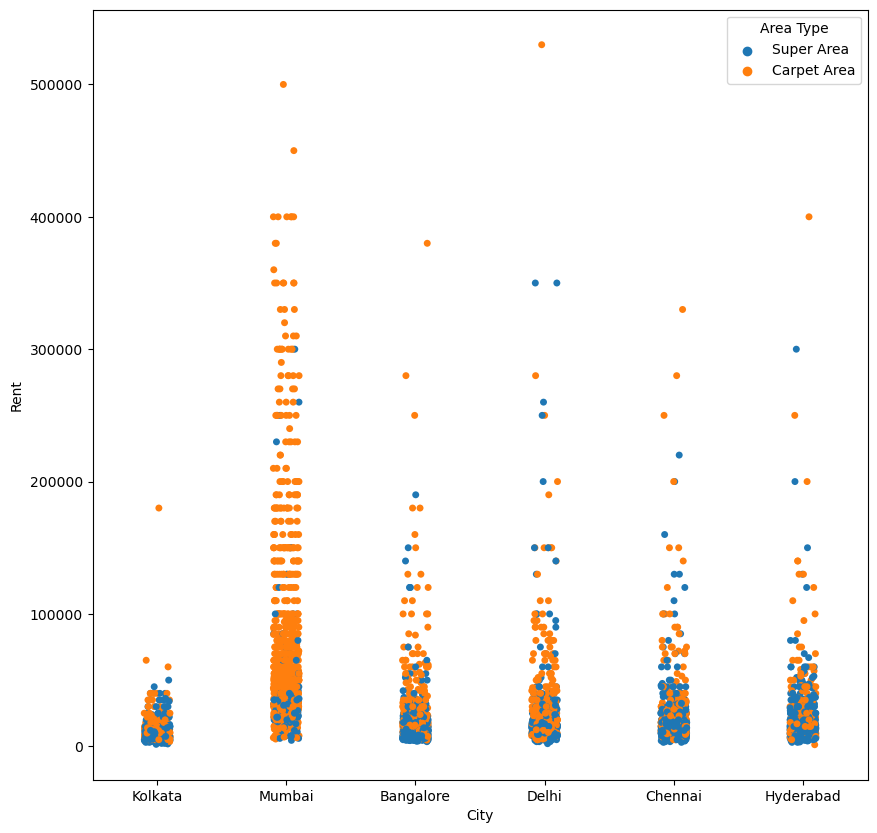

In [18]:
plt.figure(figsize=(10,10))
data = df[df['Rent']<6e5]
sns.stripplot(x='City',y='Rent',data=data,hue='Area Type')
data['City'].value_counts()

                   BHK  Bathroom      Rent  Floor Number      Size
BHK           1.000000  0.794829  0.369685      0.223534  0.716114
Bathroom      0.794829  1.000000  0.441197      0.330301  0.740669
Rent          0.369685  0.441197  1.000000      0.326214  0.413528
Floor Number  0.223534  0.330301  0.326214      1.000000  0.169290
Size          0.716114  0.740669  0.413528      0.169290  1.000000


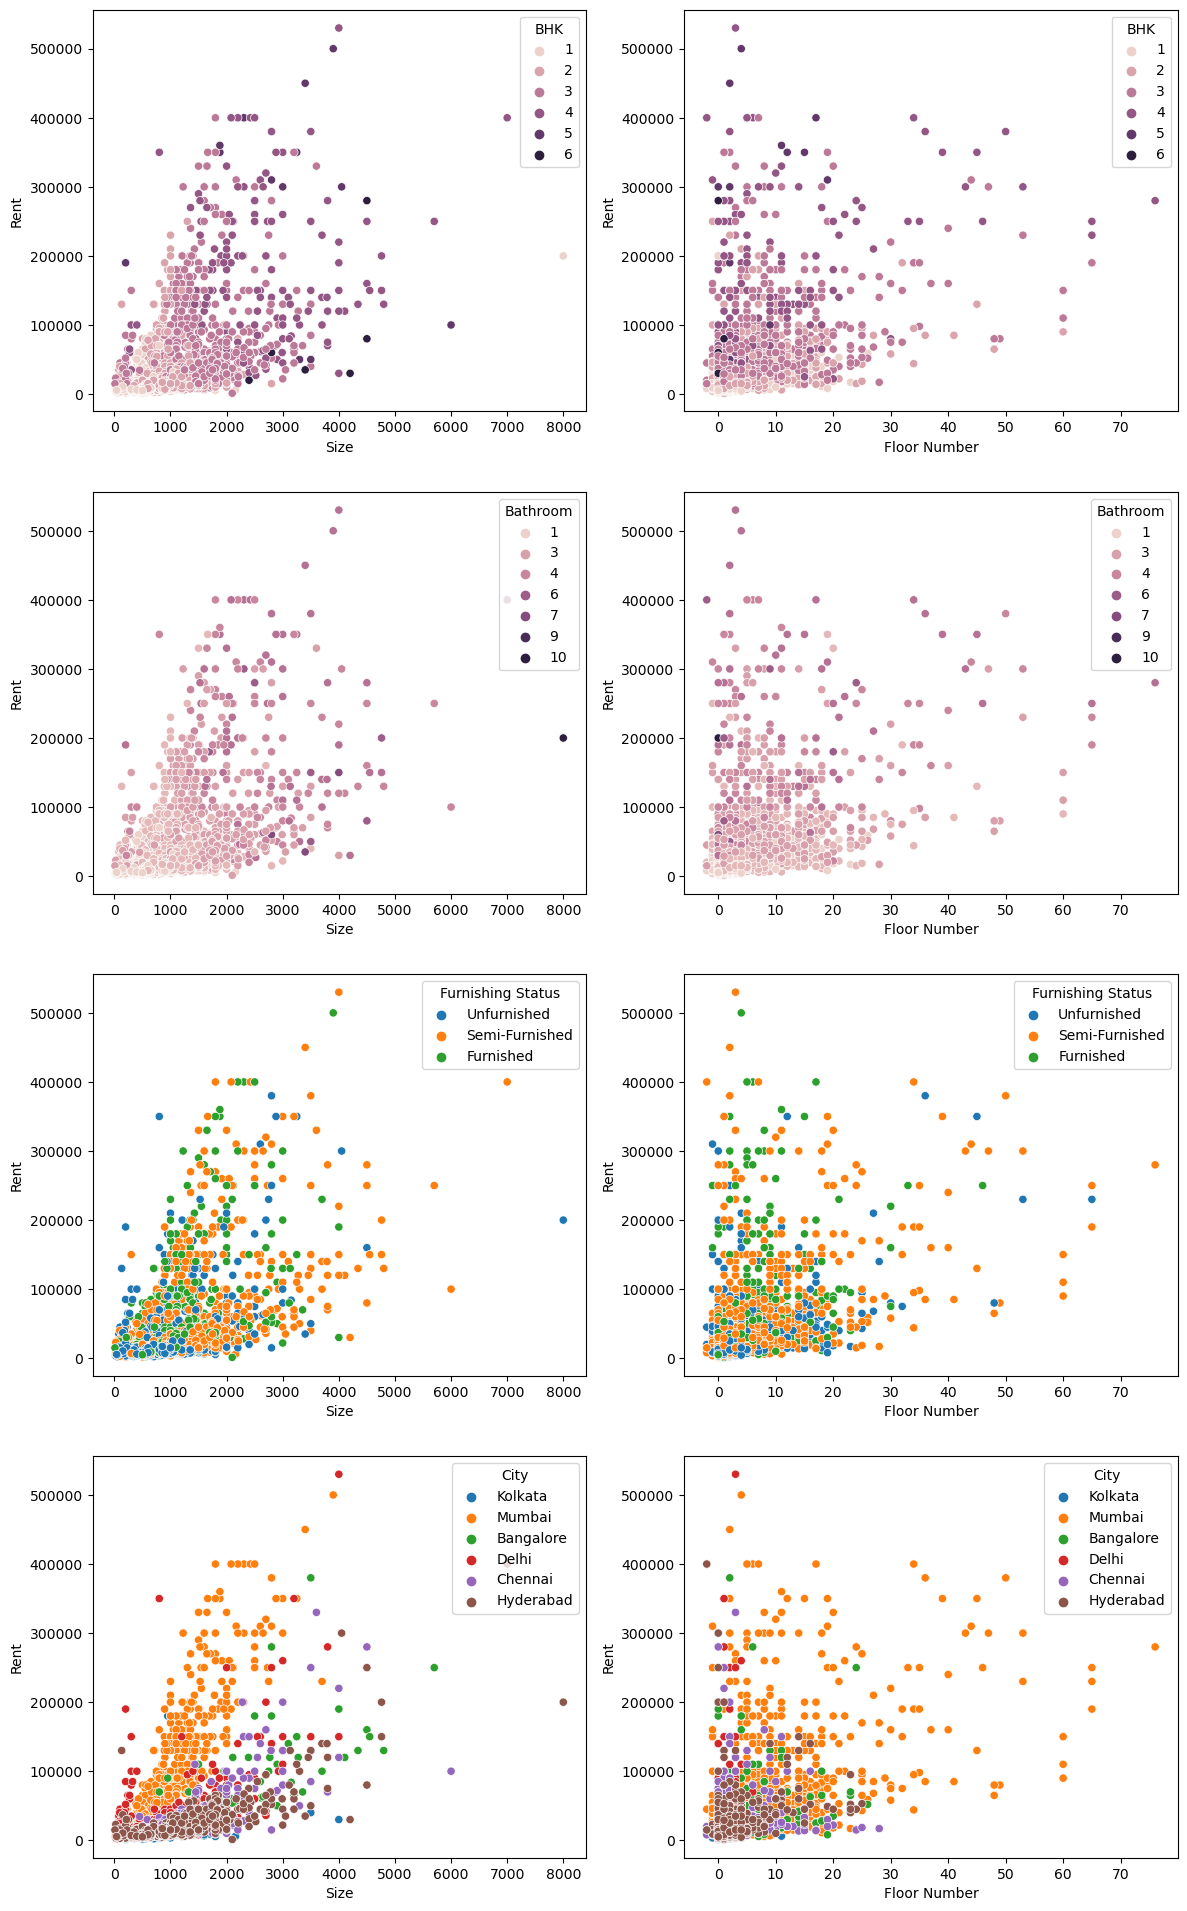

In [19]:
print(df[['BHK','Bathroom','Rent','Floor Number','Size']].corr())
# Chart of rent with hue for bhk, bathroom,rent
# Furnishing status, area type
# Cities
data = df[df['Rent']<6e5]
fig,axes = plt.subplots(figsize=(14,24),nrows=4,ncols=2)
for i,column in enumerate(['BHK','Bathroom','Furnishing Status','City']):
    # axes_num = list(map(int,bin(i*2)[2:].zfill(3)))
    ax1 = axes[i,0]
    sns.scatterplot(y=data['Rent'],x=data['Size'],hue=data[column],ax=ax1)
    ax2 = axes[i,1]
    sns.scatterplot(y=data['Rent'],x=data['Floor Number'],hue=data[column],ax=ax2)


* Brighter colors are common in flats with smaller sizes which means that the bigger the flat, the more BHK and bathrooms are inside which is totally logical. Although it's not not case in Floor number column 
* Furnishing status appears to be equally distributed among all the sizes
* Among the cities, a clear distinction delineates between more affordable location like Hyderabad and pricier one in Mumbai for instance

#### Now let's dig a little bit deeper to unfold the correlation between size and rent in each city

Text(0, 0.5, 'Rent')

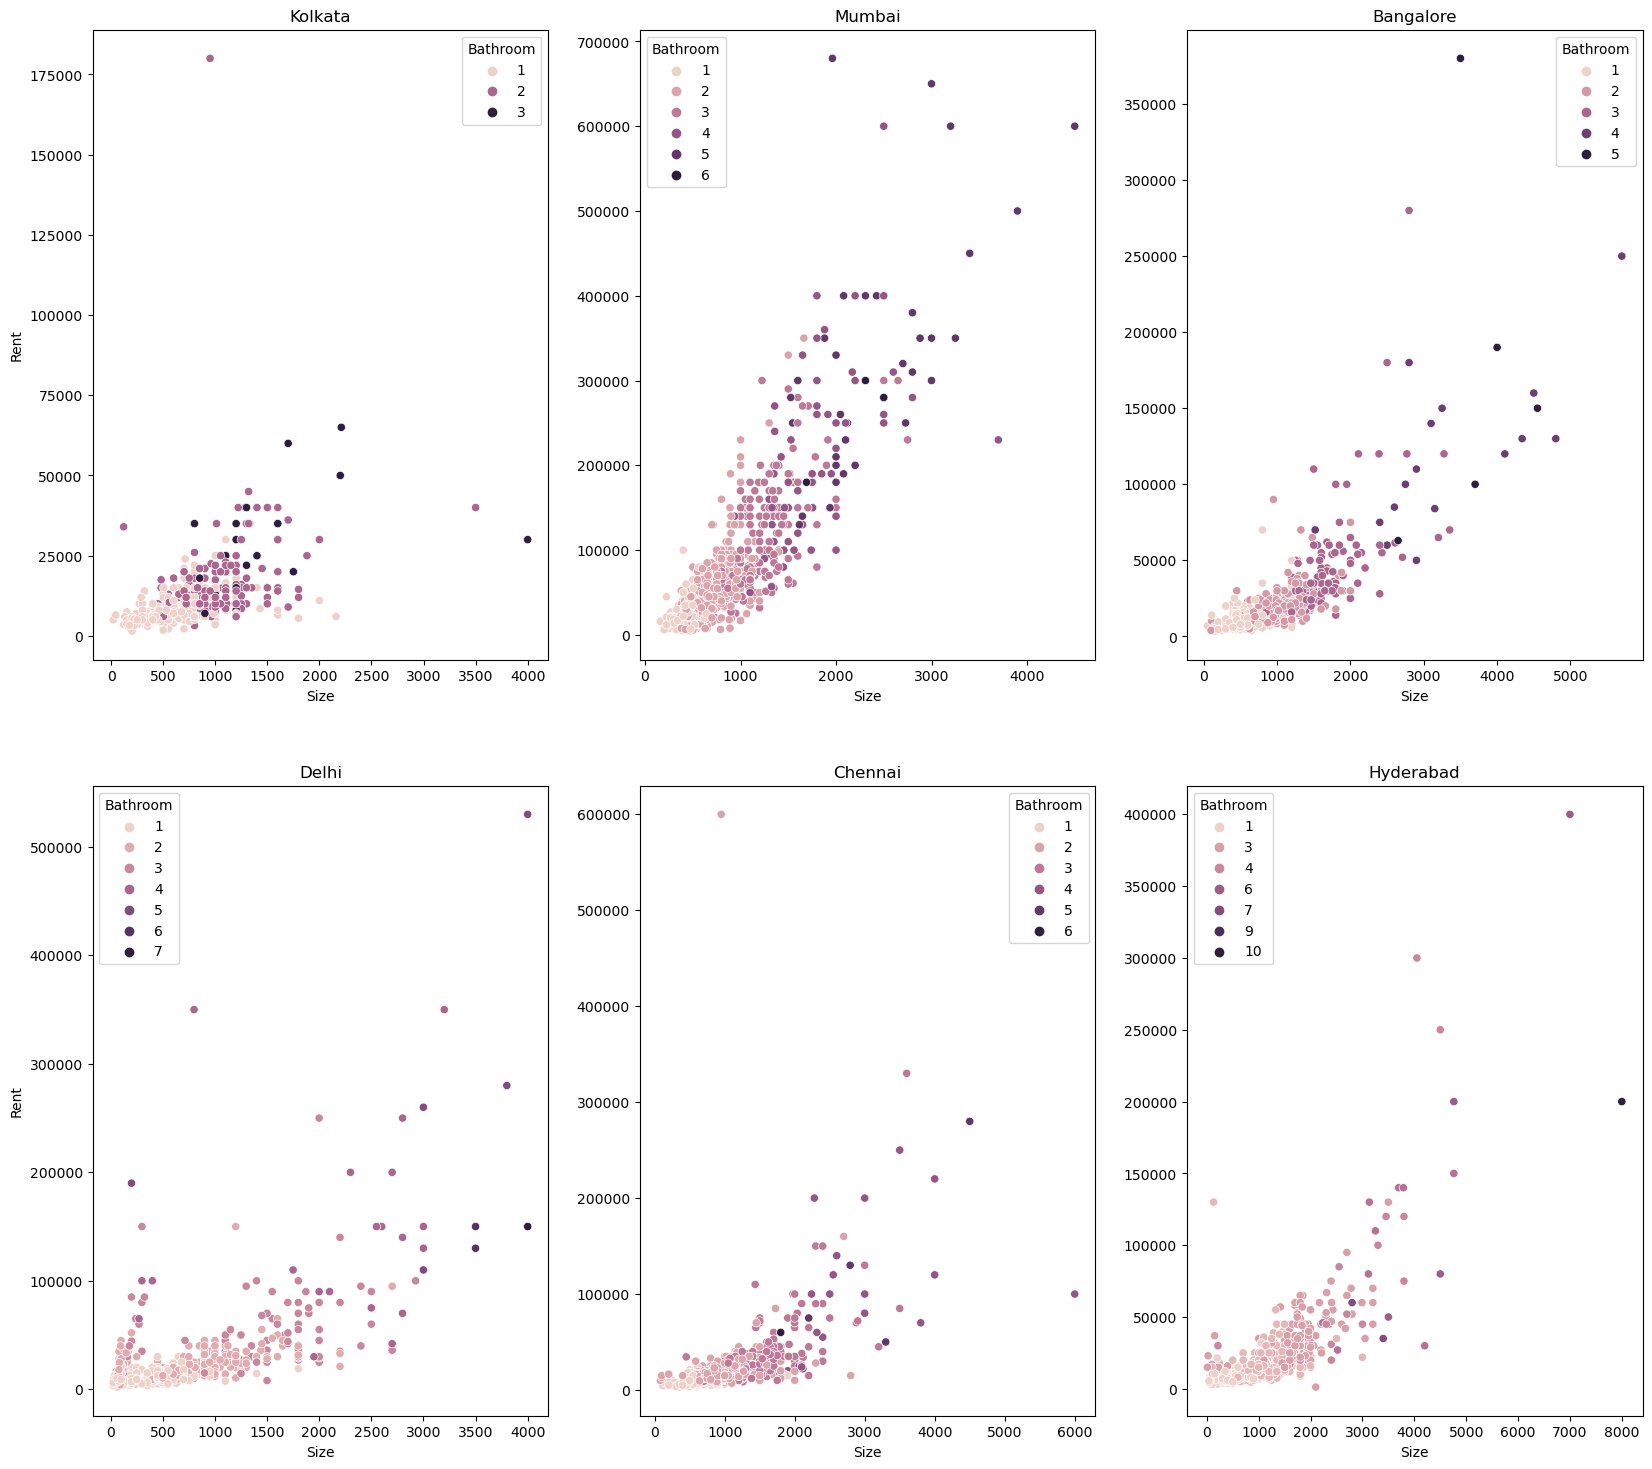

In [20]:
fig,axes = plt.subplots(figsize=(20,18),nrows=2,ncols=3)
data = df[df['Rent']<7e5][['Rent','Size','City','Bathroom']]
for i,city in enumerate(df['City'].unique()):
    
    col = i%3
    row = int(i/3)
    ax=axes[row,col]
    data_plot = data[(data['City']==city)]
    sns.scatterplot(x=data_plot['Size'],y=data_plot['Rent'],ax=ax,hue=data_plot['Bathroom'])
    ax.set_title(city)
    ax.set_ylabel("")
axes[0,0].set_ylabel("Rent")
axes[1,0].set_ylabel("Rent")

* Profound impact of size on the rent price, although not in every city, which may indicate that correlation size-rent differs depending on the city
* Number of bathrooms also tend to rise with size

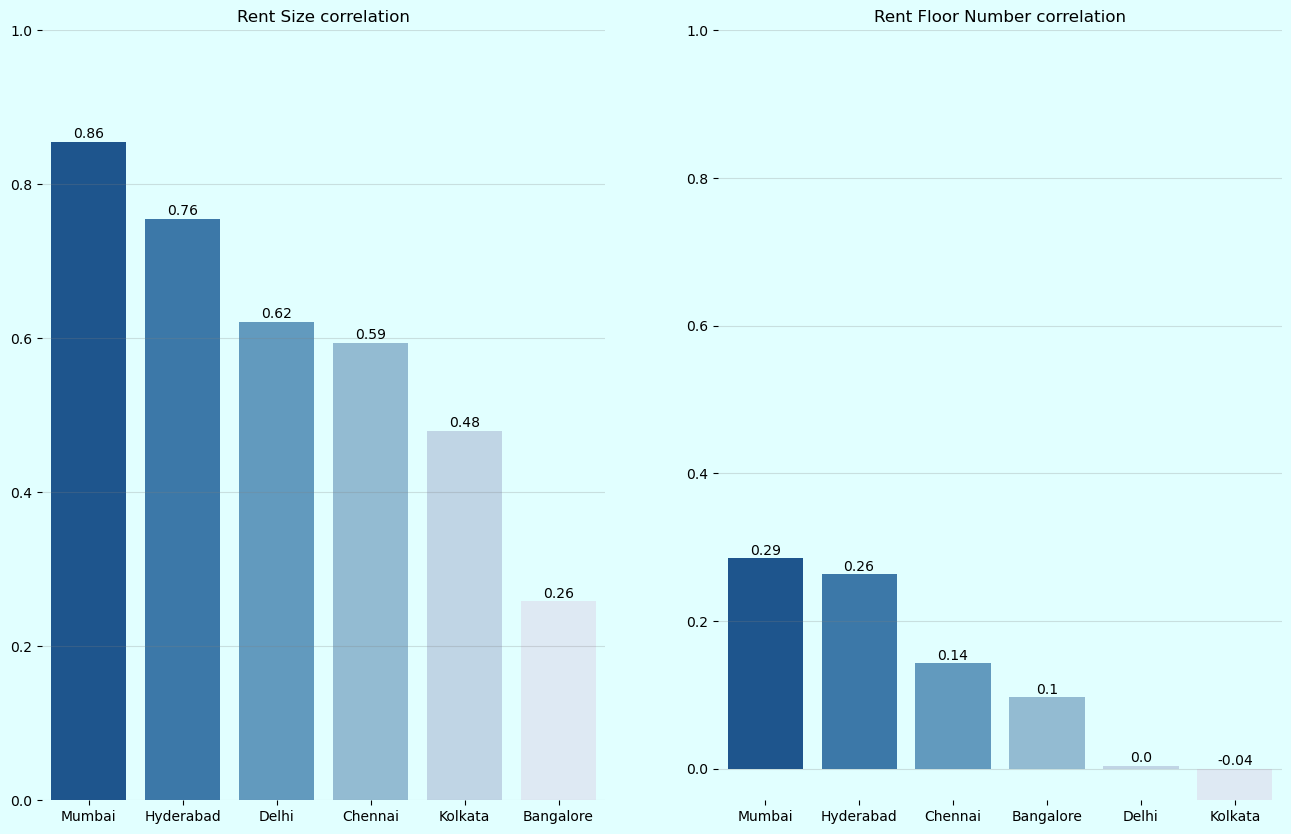

In [21]:
fig,axes = plt.subplots(figsize=(16,10),ncols=2)
fig.patch.set_facecolor('#e1ffff') 
for ax in axes:
    ax.set_facecolor('#e1ffff')  # Change background color here
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['bottom'].set_visible(False)  # Hide bottom spine
    ax.spines['left'].set_visible(False)  # Hide left spine

for i,column in enumerate(['Size','Floor Number']):
    ax = axes[i]
    #Correlation for each city and size
    correlation_by_city = df.pivot_table(index='City', values=['Rent', column],aggfunc='corr')
    # correlation_by_city = [(city, correlation_by_city.loc[city].loc['Size']['Rent']) for city in df['City'].unique()]
    correlation_by_city =  correlation_by_city[['Rent']][correlation_by_city['Rent']!=1].sort_values(by="Rent",ascending=False)
    data = correlation_by_city['Rent']
    datax = data.index
    datax = [el[0] for el in datax]
    sns.barplot(y=data.values,x=datax,palette='Blues_r',ax=ax)
    ax.set_title("Rent "+column+" correlation")
    for i,value in enumerate(data.values):
        ax.text(i,max(0.005,value+0.005),s=round(value,2),ha='center')
    ax.set_ylim(min(0,data.values.min()),1)
    ax.grid(axis='y', linestyle='-', alpha=0.25,color='grey')
    
    




* Mumbai exhibits really high dependency between size of the flat and the Rent price
* In bangalore we have the lowest correlation of 0.26 which significatnly lowers the average correlation
* This insight might be helpful when it comes to running a machine learning model since city plays a vital role in rent prediction

In [22]:
cols_enc = []
for col in df.columns:
    if  df[col].dtype =='object':
        cols_enc.append(col)
print(cols_enc)
cols_enc.remove("Posted On")
cols_enc.remove("Month")
cols_enc

['Posted On', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact', 'Month']


['Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [23]:
labelencoder = LabelEncoder()
for col in cols_enc:
        df[col+' Num'] = labelencoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4745
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Posted On              4744 non-null   object
 1   BHK                    4744 non-null   int64 
 2   Rent                   4744 non-null   int64 
 3   Size                   4744 non-null   int64 
 4   Area Type              4744 non-null   object
 5   Area Locality          4744 non-null   object
 6   City                   4744 non-null   object
 7   Furnishing Status      4744 non-null   object
 8   Tenant Preferred       4744 non-null   object
 9   Bathroom               4744 non-null   int64 
 10  Point of Contact       4744 non-null   object
 11  Floor Number           4744 non-null   int64 
 12  Month                  4744 non-null   object
 13  Area Type Num          4744 non-null   int32 
 14  Area Locality Num      4744 non-null   int32 
 15  City Num               474

In [24]:
df.drop(columns=['Month','Posted On'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BHK                    4744 non-null   int64 
 1   Rent                   4744 non-null   int64 
 2   Size                   4744 non-null   int64 
 3   Area Type              4744 non-null   object
 4   Area Locality          4744 non-null   object
 5   City                   4744 non-null   object
 6   Furnishing Status      4744 non-null   object
 7   Tenant Preferred       4744 non-null   object
 8   Bathroom               4744 non-null   int64 
 9   Point of Contact       4744 non-null   object
 10  Floor Number           4744 non-null   int64 
 11  Area Type Num          4744 non-null   int32 
 12  Area Locality Num      4744 non-null   int32 
 13  City Num               4744 non-null   int32 
 14  Furnishing Status Num  4744 non-null   int32 
 15  Tenant Preferred Num   474

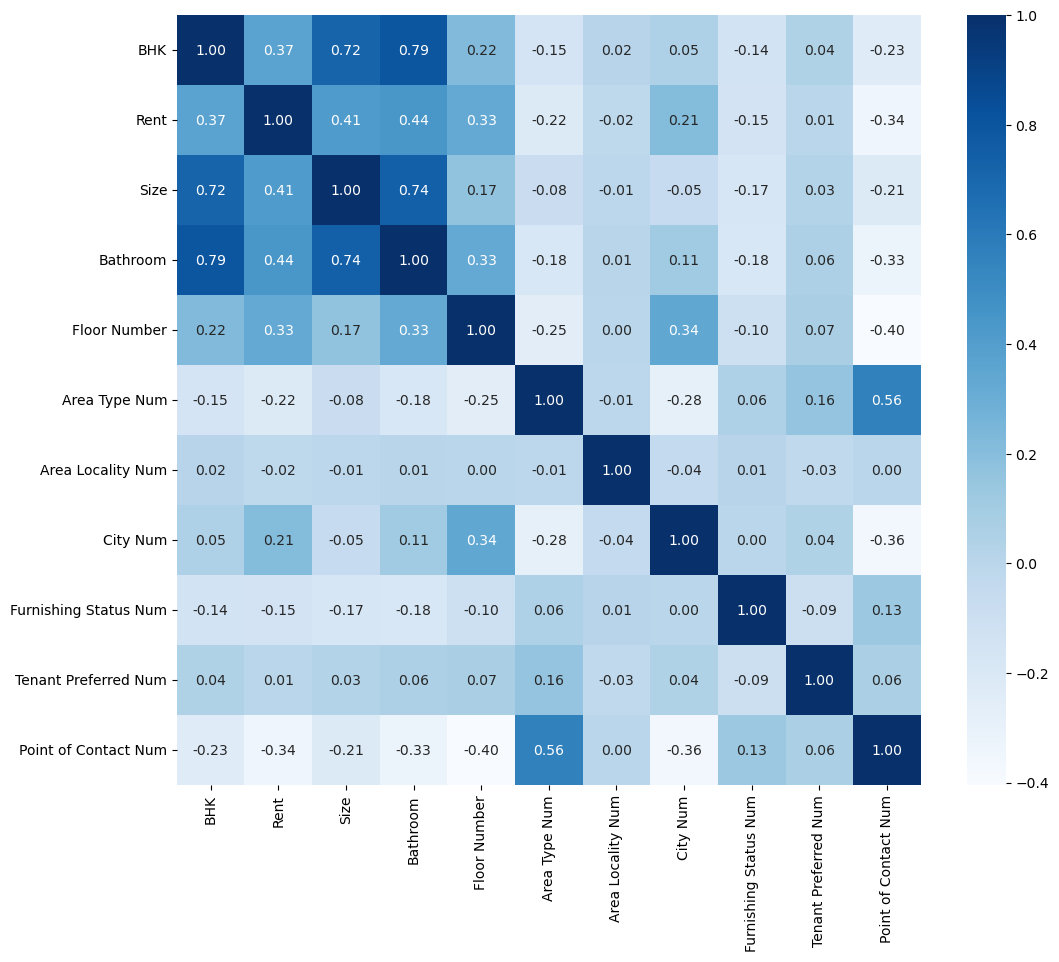

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Blues', fmt=".2f")
plt.rcParams['figure.facecolor'] = '#e6f1f1'

Given that, I'm going to drop 2 columns which have virtually no correlation with rent.
- Area localty column
- Tenant preferred column

In [26]:
df.drop(columns=['Area Locality Num','Tenant Preferred Num'], inplace=True)
print(df.isna().sum(),"\n")
print(df.isnull().sum(),"\n")

BHK                      0
Rent                     0
Size                     0
Area Type                0
Area Locality            0
City                     0
Furnishing Status        0
Tenant Preferred         0
Bathroom                 0
Point of Contact         0
Floor Number             0
Area Type Num            0
City Num                 0
Furnishing Status Num    0
Point of Contact Num     0
dtype: int64 

BHK                      0
Rent                     0
Size                     0
Area Type                0
Area Locality            0
City                     0
Furnishing Status        0
Tenant Preferred         0
Bathroom                 0
Point of Contact         0
Floor Number             0
Area Type Num            0
City Num                 0
Furnishing Status Num    0
Point of Contact Num     0
dtype: int64 



### Correlation plot for each city

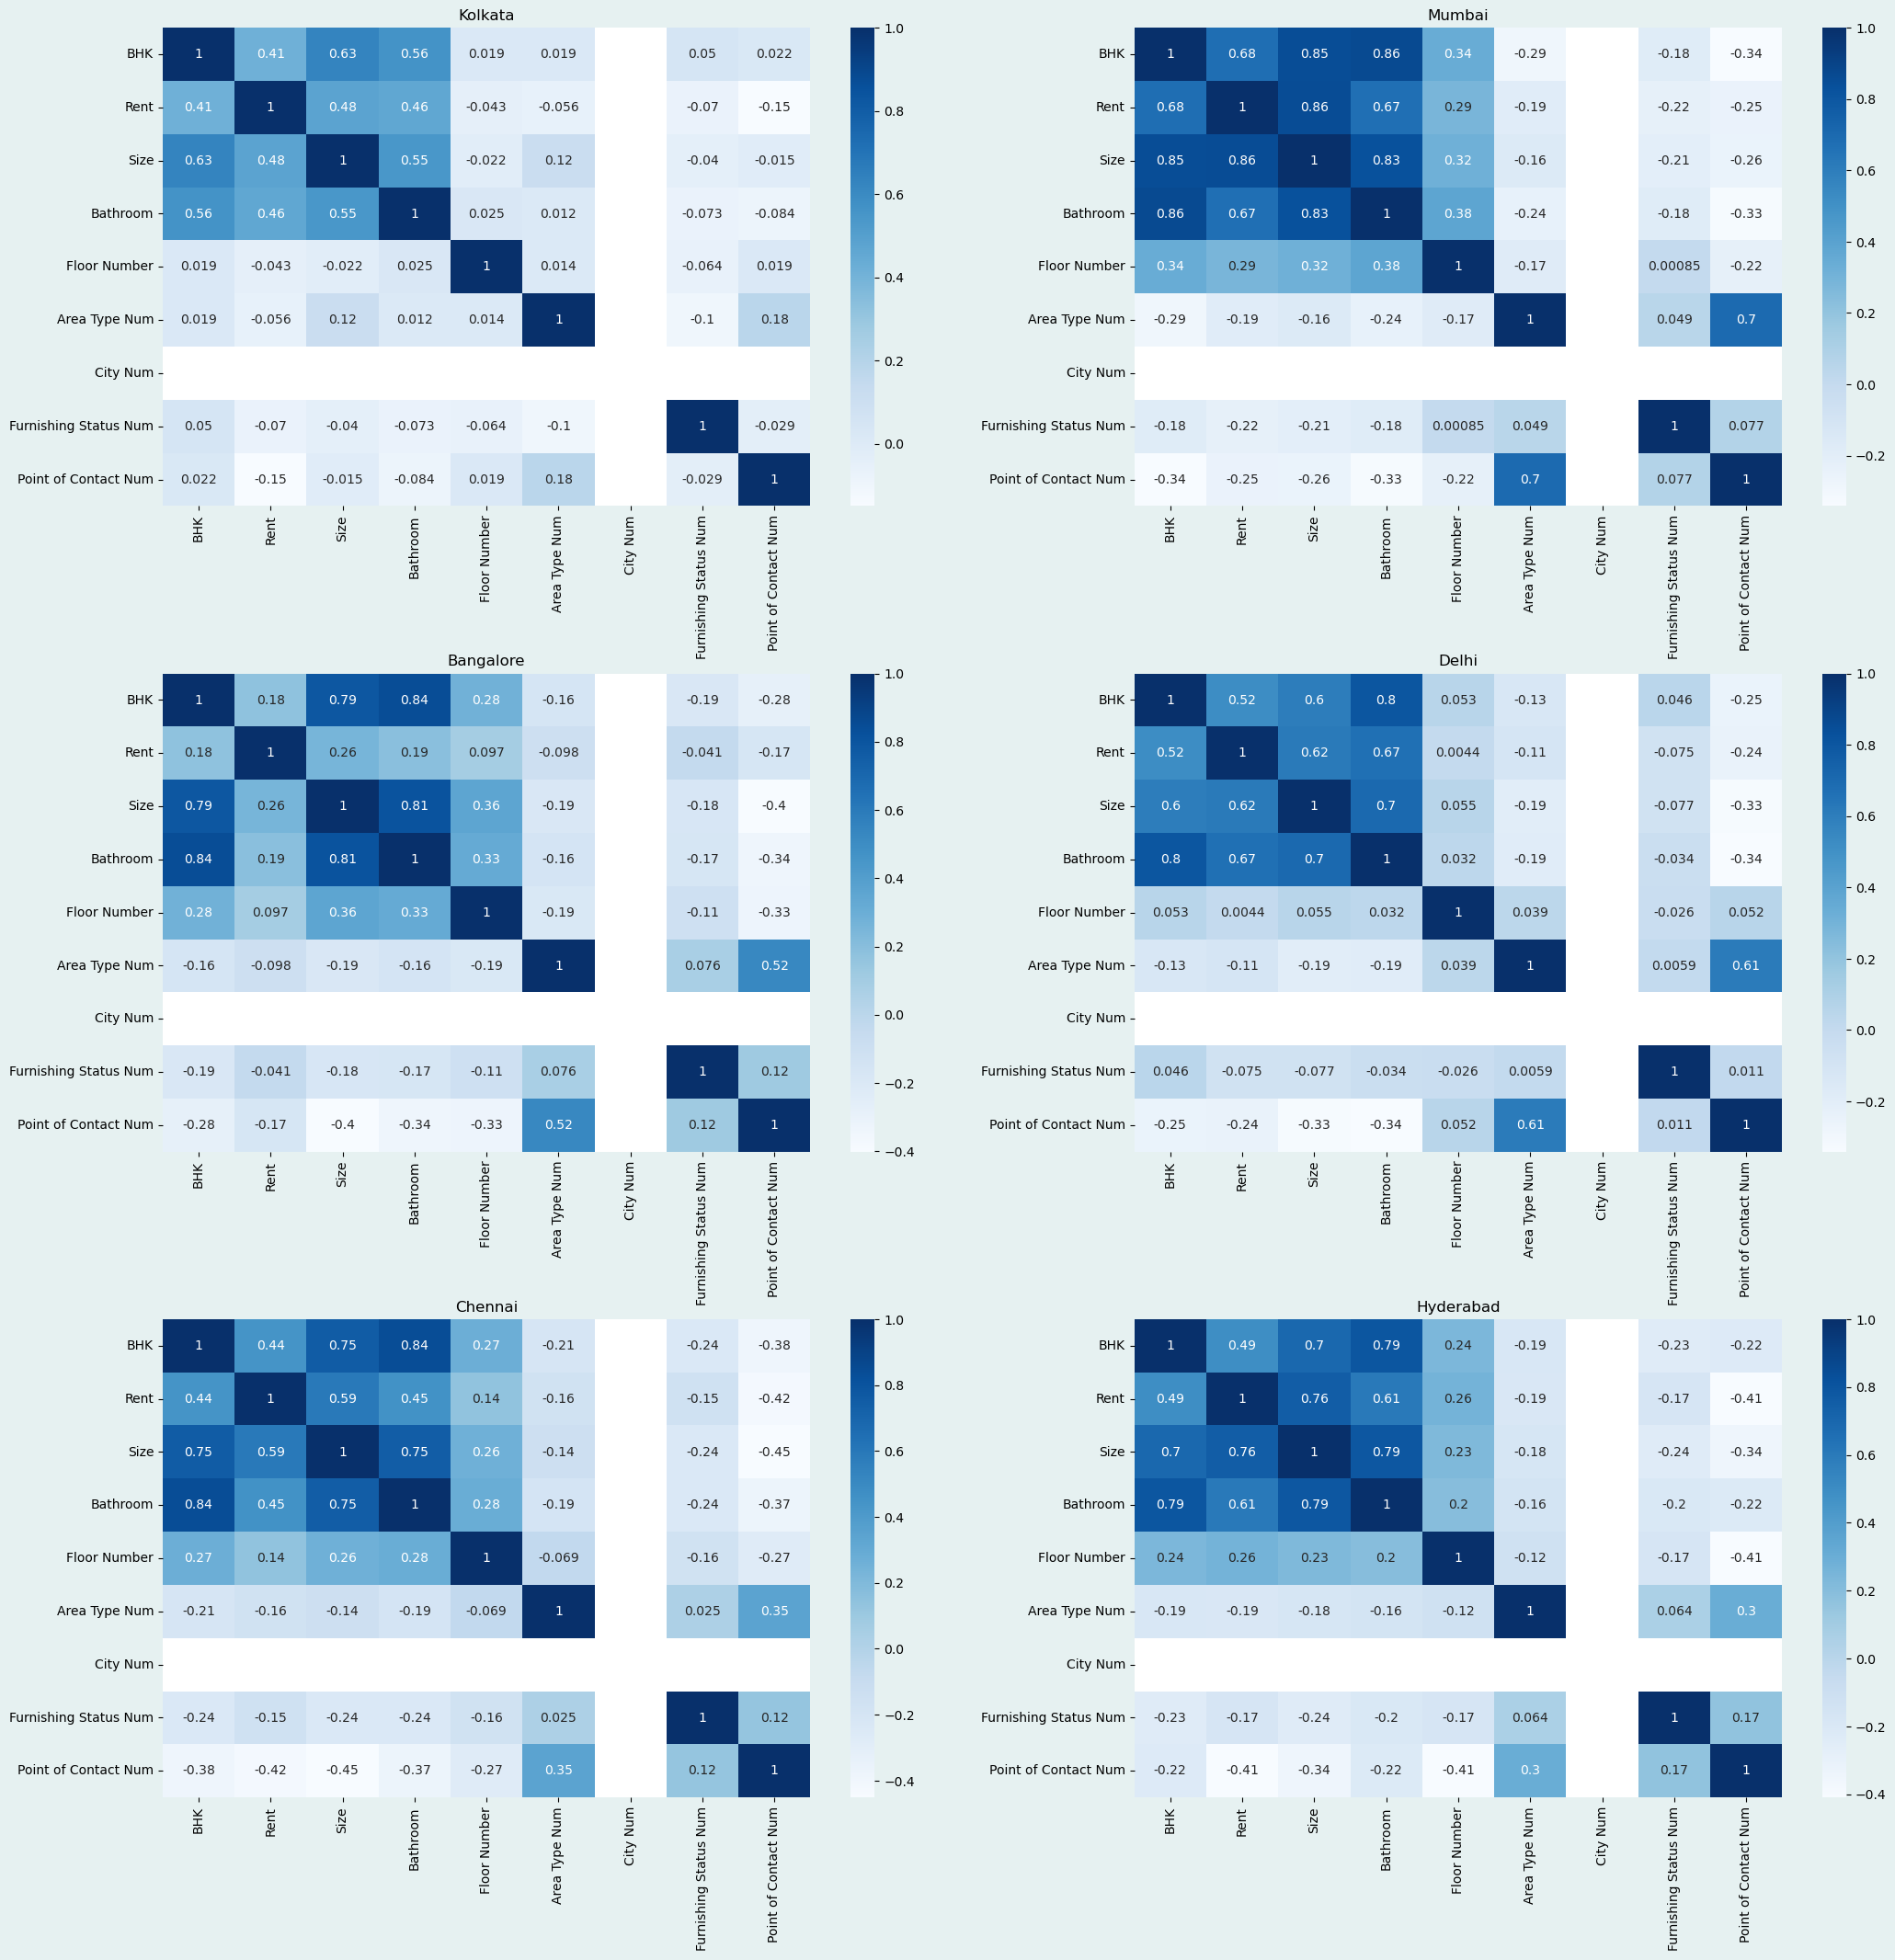

In [27]:
fig,axes = plt.subplots(figsize=(25,25),nrows=3,ncols=2)
data = df
for i,city in enumerate(df['City'].unique()):
    
    col = i%2
    row = int(i/2)
    ax=axes[row,col]
    data_corr = data[(data['City']==city)].select_dtypes(exclude='object').corr()
    corrplt = sns.heatmap(data_corr, annot=True, cmap='Blues',ax=axes[row,col])
    # corrplt.set_xticklabels(corrplt.get_xticklabels(), fontsize=17)
    # corrplt.set_xticklabels(corrplt.get_yticklabels(), fontsize=17)
    ax.set_title(city)
plt.subplots_adjust(hspace=0.35)
# axes[0,0].set_ylabel("Rent")
# axes[1,0].set_ylabel("Rent")

* Out of every city Bangalore's rent price appears to be the least correlated with any other feauture
* The most noticable correlations can be found in the left-top corner which includes BHK, Rent, Size, Bathroom and partially Floor number
* There's also a moderate correlation between Point of Contact and Rent 
* In some places (Delhi, Mumbai) Point of conatact is highly explained by Area type feature

In [28]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam

### Splitting and scaling the dataset

In [29]:
# Splitting the dataset 
data = df.select_dtypes(exclude='object')
X = data.drop(columns=['Rent'])
y = data[['Rent']]

X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50,random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

# Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_cv_sc = sc.transform(X_cv)
X_test_sc = sc.transform(X_test)
print("X_train scaled: ",X_train_sc)
X.columns


X_train.shape (2846, 8) y_train.shape (2846, 1)
X_cv.shape (949, 8) y_cv.shape (949, 1)
X_test.shape (949, 8) y_test.shape (949, 1)
X_train scaled:  [[-0.09468866 -0.16131456  0.03876613 ... -0.80702591 -0.36970867
   0.68269007]
 [ 1.10836463  0.82899479  1.15319458 ...  1.43648641 -0.36970867
  -1.46538725]
 [-0.09468866  0.13268353  0.03876613 ...  0.31473025  1.09983166
   0.68269007]
 ...
 [ 1.10836463 -0.24487191  0.03876613 ...  1.43648641 -0.36970867
   0.68269007]
 [-0.09468866  0.21005145  0.03876613 ...  0.31473025 -0.36970867
   0.68269007]
 [-1.29774196 -0.79573148 -1.07566231 ...  0.87560833  1.09983166
   0.68269007]]


Index(['BHK', 'Size', 'Bathroom', 'Floor Number', 'Area Type Num', 'City Num',
       'Furnishing Status Num', 'Point of Contact Num'],
      dtype='object')

### Building Neural Network

In [ ]:
tf.random.set_seed(1234)
lrs = [0.001,0.01,0.05,0.1,0.15,0.30,0.5]


histories_complex=[None]*len(lrs)
models_complex=[None]*len(lrs)
for i,lr in enumerate(lrs):
    models_complex[i] = Sequential(
        [
            Dense(128,activation='relu',name = "L1"),
            Dense(32,activation = 'relu', name = "L2"), 
            Dense(8,activation = 'relu', name = "L3"),
            Dense(1, name = "L4"), 
        ], name='Complex'
    )
    models_complex[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    )
    histories_complex[i] = models_complex[i].fit(X_train_sc,y_train,epochs=500)

histories_simple=[None]*len(lrs)
models_simple=[None]*len(lrs)
for i,lr in enumerate(lrs):
    models_simple[i] = Sequential(
        [
            Dense(32,activation = 'relu', name = "L1"), 
            Dense(4,activation = 'relu', name = "L2"),
            Dense(1, name = "L3"), 
        ], name='Complex'
    )
    models_simple[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    )
    histories_simple[i] = models_simple[i].fit(X_train_sc,y_train,epochs=500)



Epoch 1/500
89/89 [==============================] - 1s 2ms/step - loss: 4640841216.0000
Epoch 2/500
89/89 [==============================] - 0s 1ms/step - loss: 4618361344.0000
Epoch 3/500
89/89 [==============================] - 0s 1ms/step - loss: 4476820992.0000
Epoch 4/500
89/89 [==============================] - 0s 2ms/step - loss: 4046838784.0000
Epoch 5/500
89/89 [==============================] - 0s 1ms/step - loss: 3260610560.0000
Epoch 6/500
89/89 [==============================] - 0s 2ms/step - loss: 2403727360.0000
Epoch 7/500
89/89 [==============================] - 0s 2ms/step - loss: 1907725568.0000
Epoch 8/500
89/89 [==============================] - 0s 2ms/step - loss: 1751361024.0000
Epoch 9/500
89/89 [==============================] - 0s 1ms/step - loss: 1715168384.0000
Epoch 10/500
89/89 [==============================] - 0s 1ms/step - loss: 1699590784.0000
Epoch 11/500
89/89 [==============================] - 0s 1ms/step - loss: 1688339840.0000
Epoch 12/500
89/89 

In [30]:
def plot_history(histories,labels):
    for history,label in zip(histories,labels):
        loss = pd.DataFrame(history.history['loss']).rolling(15).mean()
        min_loss = loss.tail(10).mean()[0]
        print("{rate:.3f} loss in the end -> {loss:.2e}".format(rate=label,loss=min_loss))
        plt.plot(loss,label=label)


In [ ]:

plot_history(histories_complex,labels=lrs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Learning rates' lossses of Complex NN")
plt.legend()
plt.show()


plot_history(histories_simple,labels=lrs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Learning rates' lossses of Simple NN")
plt.legend()
plt.show()

Now let's compare it with validation set.

In [31]:
def get_train_cv_error(model,X_train_sc=X_train_sc,X_cv_sc=X_cv_sc,metric=mean_squared_error):
    y_pred_train = model.predict(X_train_sc)
    train_err = metric(y_train,y_pred_train)
    
    y_pred_cv = model.predict(X_cv_sc)
    cv_err  = metric(y_cv,y_pred_cv)
    return train_err,cv_err


In [ ]:
train_errors = [[] for _ in range(2)]  #[[simple_model_errors],[complex_model_erros]]
cv_errors = [[] for _ in range(2)]
print
for i,lr in enumerate(lrs):
    
    cur_model_s = models_simple[i]
    train_err,cv_err = get_train_cv_error(cur_model_s)
    train_errors[0].append(train_err)
    cv_errors[0].append(cv_err)
    print("Simple model: Train error, learning rate {lr:.3f} -> {train_e:.2e}, cross validation error -> {cv_e:.2e}".format(lr=lr,train_e=train_err,cv_e=cv_err))

    cur_model_c = models_complex[i]
    train_err,cv_err = get_train_cv_error(cur_model_c)
    train_errors[1].append(train_err)
    cv_errors[1].append(cv_err)
    print("C model: Train error, learning rate {lr:.3f} -> {train_e:.2e}, cross validation error -> {cv_e:.2e}".format(lr=lr,train_e=train_err,cv_e=cv_err))

print(train_errors)



 1/89 [..............................] - ETA: 5s

30/30 [==============================] - 0s 539us/step
Simple model: Train error, learning rate 0.001 -> 1.48e+09, cross validation error -> 1.50e+09
30/30 [==============================] - 0s 539us/step
C model: Train error, learning rate 0.001 -> 7.90e+08, cross validation error -> 1.01e+09
30/30 [==============================] - 0s 538us/step
Simple model: Train error, learning rate 0.010 -> 7.64e+08, cross validation error -> 1.04e+09
30/30 [==============================] - 0s 538us/step
C model: Train error, learning rate 0.010 -> 4.14e+08, cross validation error -> 1.45e+09
30/30 [==============================] - 0s 759us/step
Simple model: Train error, learning rate 0.050 -> 6.76e+08, cross validation error -> 1.30e+09
30/30 [==============================] - 0s 538us/step
C model: Train error, learning rate 0.050 -> 2.13e+08, cross validation error -> 1.37e+09
30/30 [==============================] - 0s 539us/step
Simple model: Train error, learning rate 0.100 -> 6.28e+08, 

In [ ]:
np.min(train_errors[0])

491819817.8095936

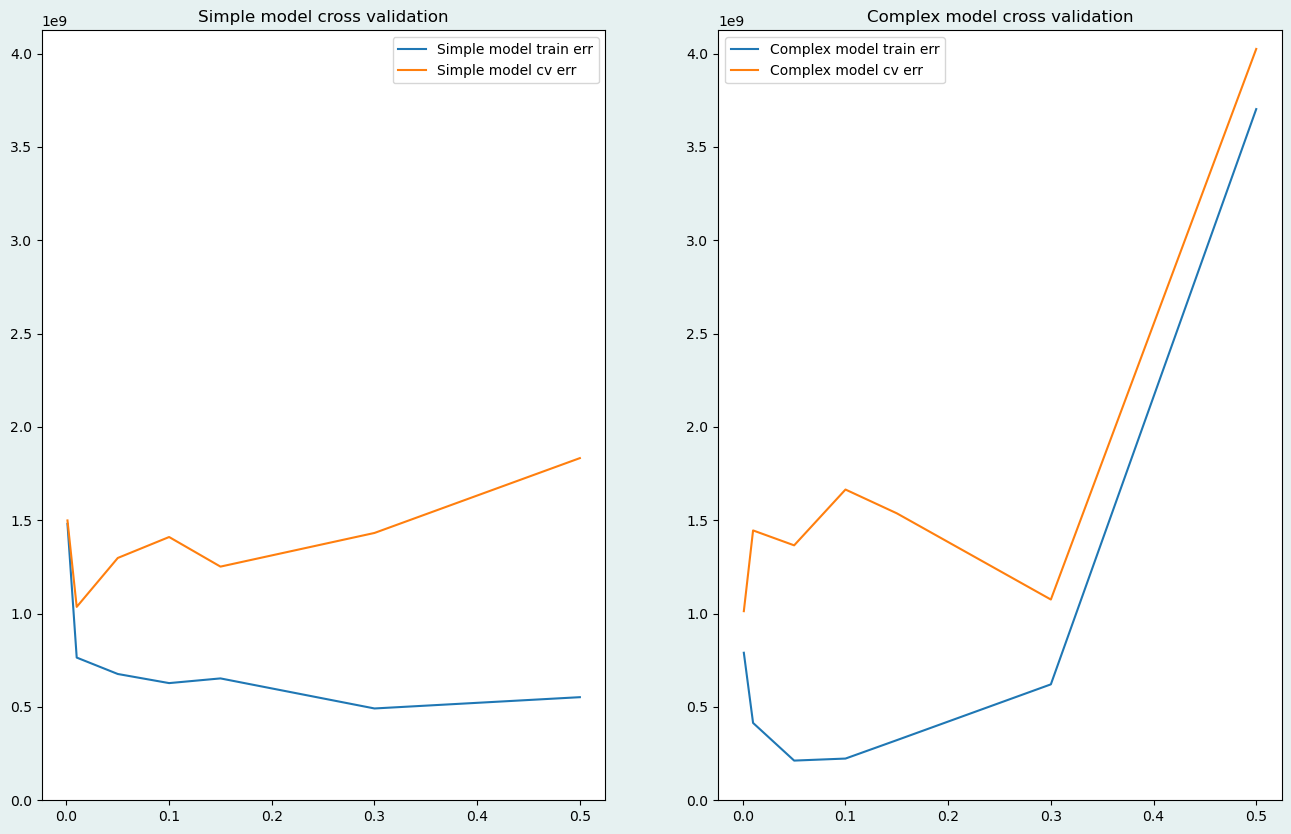

In [ ]:
fig,axes = plt.subplots(figsize=(16,10),ncols=2,nrows=1)

y_max = max(max(train_errors[0]), max(cv_errors[0]),max(train_errors[1]), max(cv_errors[1]))
# y_range = y_max - y_min

ax = axes[0]
ax.plot(lrs,train_errors[0],label='Simple model train err')
ax.plot(lrs,cv_errors[0],label='Simple model cv err')
ax.set_title('Simple model cross validation')
ax.set_ylim(0,y_max+0.1e9)
ax.legend()

ax = axes[1]
ax.plot(lrs,train_errors[1],label='Complex model train err')
ax.plot(lrs,cv_errors[1],label='Complex model cv err')
ax.set_title('Complex model cross validation')
ax.set_ylim(0,y_max+0.1e9)
ax.legend()

plt.show()

* Simple model better generalizes on unseen data
* For simple model I'll pick lr=0.1 while for the complex model i'll pick lr=0.05 which provides best trade-off for train-validation set

In [ ]:
X.columns[:]

Index(['BHK', 'Size', 'Bathroom', 'Floor Number', 'Area Type Num', 'City Num',
       'Furnishing Status Num', 'Point of Contact Num'],
      dtype='object')

### Feature selection using Recursive Feature Elimination (RFE)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
tf.random.set_seed(1234)
# rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=6)
# rfe.fit(X,y)
 

# I'll perform feature selection on simple NN model

rfe_range = range(2,X.shape[1]+1) 
models_rfe = [None] * len(rfe_range)
train_err_rfe = []
cv_err_rfe = []
feat_indices = []


for i,num_of_feat in enumerate(rfe_range):
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=num_of_feat)
    rfe.fit(X,y)
    selected_features = [x for x,val in enumerate(rfe.support_) if val]
    feat_indices.append(selected_features)
    print(num_of_feat,selected_features)
    X_train_sc_rfe = X_train_sc[:,selected_features]
    X_cv_sc_rfe = X_cv_sc[:,selected_features]


    models_rfe[i] = Sequential(
        [
            Dense(128,activation='relu',name = "L1",kernel_regularizer = tf.keras.regularizers.L1L2(0.01)),
            Dense(32,activation = 'relu', name = "L2",kernel_regularizer = tf.keras.regularizers.L1L2(0.01)), 
            Dense(8,activation = 'relu', name = "L3",kernel_regularizer = tf.keras.regularizers.L1L2(0.01)),
            Dense(1, name = "L4"), 
        ], name='Complex'
    )
    models_rfe[i].compile(
        loss = tf.keras.losses.MeanAbsoluteError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
    )
    models_rfe[i].fit(X_train_sc_rfe,y_train,epochs=500,verbose=0)
    # cur_model = models_rfe[i]
    # for j,col in zip(range(X.shape[1]),X.columns):
        #print(f"{rfe.support_[j]}, rank:{rfe.ranking_[j]} {col}")
    

2 [1, 5]
3 [1, 2, 5]
4 [1, 2, 5, 6]
5 [1, 2, 5, 6, 7]
6 [1, 2, 3, 5, 6, 7]
7 [0, 1, 2, 3, 5, 6, 7]
8 [0, 1, 2, 3, 4, 5, 6, 7]


30/30 [==============================] - 0s 345us/step


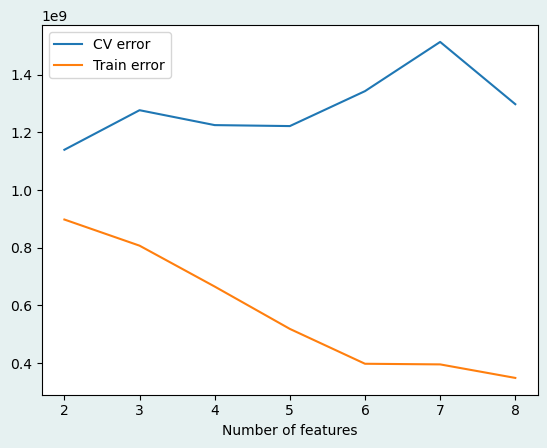

      Size
3184   860
1010  1500
4412  1050
1400   330
1017   720
839   3400
3075   800
2015   900
1649  1080
192   1110 
         Rent
3184   18000
1010  190000
4412    8500
1400   30000
1017   60000
839   450000
3075    8000
2015   15000
1649   17500
192    10000
1/1 [==============================] - 0s 10ms/step
[[ 11363.084]
 [150723.08 ]
 [  9866.26 ]
 [ 30574.37 ]
 [ 47500.84 ]
 [487050.28 ]
 [ 11309.103]
 [ 13973.662]
 [ 16465.545]
 [ 12241.223]]


In [33]:
train_err_rfe=[]
cv_err_rfe=[]
for i in range(len(rfe_range)):
    train_err,cv_err = get_train_cv_error(models_rfe[i],X_train_sc=X_train_sc[:,feat_indices[i]],X_cv_sc=X_cv_sc[:,feat_indices[i]])
    train_err_rfe.append(train_err)
    cv_err_rfe.append(cv_err)
plt.plot(rfe_range,cv_err_rfe,label='CV error')
plt.plot(rfe_range,train_err_rfe,label='Train error')
plt.xlabel("Number of features")
plt.legend()
plt.show()
print(X_train[['Size']][:10],'\n',y_train[:10])
print(models_rfe[4].predict(X_train_sc[:,feat_indices[4]][:10]))


* Seems like 4 features are optimal considering bias variance trade-off

In [34]:
X_train_new = X_train_sc[:,feat_indices[2]]
X_cv_new = X_cv_sc[:,feat_indices[2]]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

model = LinearRegression()
model.fit(X_train_sc,y_train)

err_train_,err_cv_ = get_train_cv_error(model)

degree = 4  # You can adjust the degree of the polynomial
alpha=0.1
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model.fit(X_train_sc,y_train)
err_train,err_cv = get_train_cv_error(model)

((err_train_,err_cv_),(err_train,err_cv))

((1918525090.2599053, 2003092669.2708619),
 (430119150.47528374, 18954898095.006912))

In [ ]:
train_err_rfe,cv_err_rfe

([944934539.503009,
  754309414.1035123,
  666307677.7581913,
  632905080.8260612,
  369830274.6685145,
  448548551.5068049,
  330327108.47889656],
 [1195527810.9956987,
  1183290760.2553616,
  1192652851.1571913,
  1320970980.5646155,
  1367800372.8338933,
  1580741977.1660626,
  1530300798.1664622])

### Regularization
Let's punish the model with different lambda values to see which one provides the best generalization

In [ ]:
tf.random.set_seed(1234)
lambdas = [0] + [0.01, 0.1, 0.2, 0.4, 0.8, 2, 4]
lr_complex = 0.05
lr_simple = 0.1

models_complex = [None]*len(lambdas)
for i,lambda_ in enumerate(lambdas):
    models_complex[i] = Sequential(
        [
            Dense(128,activation='relu',name = "L1",kernel_regularizer = tf.keras.regularizers.L2(lambda_)),
            Dense(32,activation = 'relu', name = "L2",kernel_regularizer = tf.keras.regularizers.L2(lambda_)), 
            Dense(8,activation = 'relu', name = "L3",kernel_regularizer = tf.keras.regularizers.L2(lambda_)),
            Dense(1, name = "L4"), 
        ], name='Complex'
    )
    models_complex[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_complex)
    )
    models_complex[i].fit(X_train_new,y_train,epochs=500)


models_simple=[None]*len(lambdas)
for i,lambda_ in enumerate(lambdas):
    models_simple[i] = Sequential(
        [
            Dense(32,activation = 'relu', name = "L1",kernel_regularizer = tf.keras.regularizers.L1L2(lambda_)),
            Dense(4,activation = 'relu', name = "L2",kernel_regularizer = tf.keras.regularizers.L1L2(lambda_)),
            Dense(1, name = "L3"), 
        ], name='Complex'
    )
    models_simple[i].compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_simple)
    )
    models_simple[i].fit(X_train_new,y_train,epochs=500)



Epoch 1/500
89/89 [==============================] - 1s 962us/step - loss: 2509774848.0000
Epoch 2/500
89/89 [==============================] - 0s 787us/step - loss: 1779269376.0000
Epoch 3/500
89/89 [==============================] - 0s 726us/step - loss: 1656634752.0000
Epoch 4/500
89/89 [==============================] - 0s 746us/step - loss: 1593058176.0000
Epoch 5/500
89/89 [==============================] - 0s 966us/step - loss: 1707117312.0000
Epoch 6/500
89/89 [==============================] - 0s 905us/step - loss: 1509680640.0000
Epoch 7/500
89/89 [==============================] - 0s 857us/step - loss: 1292716032.0000
Epoch 8/500
89/89 [==============================] - 0s 851us/step - loss: 1785646592.0000
Epoch 9/500
89/89 [==============================] - 0s 836us/step - loss: 1209589504.0000
Epoch 10/500
89/89 [==============================] - 0s 938us/step - loss: 1259074304.0000
Epoch 11/500
89/89 [==============================] - 0s 940us/step - loss: 1111342848.00

In [ ]:
train_errors = [[] for _ in range(2)]  #[[simple_model_errors],[complex_model_erros]]
cv_errors = [[] for _ in range(2)]
print
for i,lambda_ in enumerate(lambdas):
    
    cur_model_s = models_simple[i]
    train_err,cv_err = get_train_cv_error(cur_model_s,X_train_new,X_cv_new)
    train_errors[0].append(train_err)
    cv_errors[0].append(cv_err)
    print("Simple model: Train error, lambda {lambda_:.3f} -> {train_e:.2e}, cross validation error -> {cv_e:.2e}".format(lambda_=lambda_,train_e=train_err,cv_e=cv_err))

    cur_model_c = models_complex[i]
    train_err,cv_err = get_train_cv_error(cur_model_c,X_train_new,X_cv_new)
    train_errors[1].append(train_err)
    cv_errors[1].append(cv_err)
    print("C model: Train error, lambda {lambda_:.3f} -> {train_e:.2e}, cross validation error -> {cv_e:.2e} \n".format(lambda_=lambda_,train_e=train_err,cv_e=cv_err))



 1/89 [..............................] - ETA: 1s

30/30 [==============================] - 0s 857us/step
Simple model: Train error, lambda 0.000 -> 6.85e+08, cross validation error -> 1.09e+09
30/30 [==============================] - 0s 589us/step
C model: Train error, lambda 0.000 -> 5.08e+08, cross validation error -> 1.67e+09 

30/30 [==============================] - 0s 728us/step
Simple model: Train error, lambda 0.010 -> 7.62e+08, cross validation error -> 1.17e+09
30/30 [==============================] - 0s 760us/step
C model: Train error, lambda 0.010 -> 4.60e+08, cross validation error -> 1.34e+09 

30/30 [==============================] - 0s 572us/step
Simple model: Train error, lambda 0.100 -> 8.14e+08, cross validation error -> 1.11e+09
30/30 [==============================] - 0s 571us/step
C model: Train error, lambda 0.100 -> 5.89e+08, cross validation error -> 1.11e+09 

30/30 [==============================] - 0s 769us/step
Simple model: Train error, lambda 0.200 -> 6.76e+08, cross validation error -> 1.18e+09
30/30 [=

C:\Users\wikto\AppData\Local\Temp\ipykernel_7872\2297592356.py:7: RuntimeWarning: divide by zero encountered in log2
  x_ax = np.log2(lambdas)


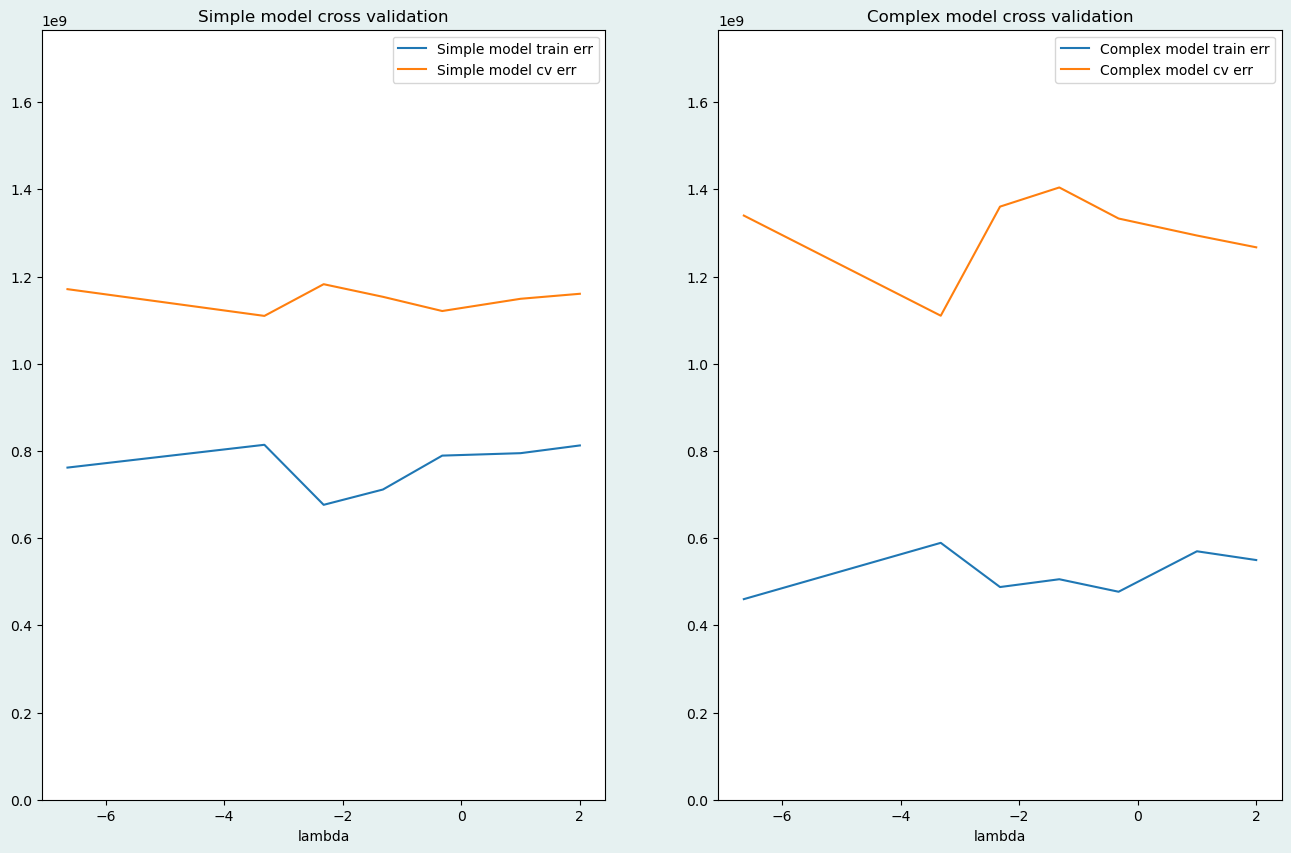

array([       -inf, -6.64385619, -3.32192809, -2.32192809, -1.32192809,
       -0.32192809,  1.        ,  2.        ])

In [ ]:
fig,axes = plt.subplots(figsize=(16,10),ncols=2,nrows=1)

y_max = max(max(train_errors[0]), max(cv_errors[0]),max(train_errors[1]), max(cv_errors[1]))
# y_range = y_max - y_min

ax = axes[0]
x_ax = np.log2(lambdas)
ax.plot(x_ax,train_errors[0],label='Simple model train err')
ax.plot(x_ax,cv_errors[0],label='Simple model cv err')
ax.set_title('Simple model cross validation')
ax.set_ylim(0,y_max+0.1e9)
ax.set_xlabel('lambda')
ax.legend()

ax = axes[1]
ax.plot(x_ax,train_errors[1],label='Complex model train err')
ax.plot(x_ax,cv_errors[1],label='Complex model cv err')
# ax.set_xticks(ticks=lambdas)
ax.set_title('Complex model cross validation')
ax.set_ylim(0,y_max+0.1e9)
ax.set_xlabel('lambda')
ax.legend()

plt.show()
x_ax

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define and train the model
model = RandomForestRegressor(n_estimators=100,max_depth=7, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train_new, y_train)

# Predict on the cross-validation set
y_pred_cv = model.predict(X_cv_new)
y_pred_tr = model.predict(X_train_new)
# Calculate mean absolute error
mae_cv = mean_absolute_error(y_cv, y_pred_cv)
mae_tr = mean_absolute_error(y_train,y_pred_tr)
print("Mean Absolute Error Validation error:", mae_cv)
print("Mean Absolute Error Train error:", mae_tr)

c:\Users\wikto\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error Validation error: 12199.4182019107
Mean Absolute Error Train error: 10096.858012718736


Complex model yields better results on trained data and slightly worse on unseen data. I'm going to abandon simpler model and now I'll try to use dropout and batch normalization in order to improve model's performance on unseen data.

In [196]:
from tensorflow.keras.callbacks import  EarlyStopping, ReduceLROnPlateau

X_train_new = X_train_sc
X_cv_new = X_cv_sc
X_train_new = X_train_sc[:,feat_indices[2]]
X_cv_new = X_cv_sc[:,feat_indices[2]]
x=0.2
reg_val=0.1
model = Sequential([
        Dense(256,activation='relu',kernel_regularizer = tf.keras.regularizers.L2(reg_val)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128,activation='relu',kernel_regularizer = tf.keras.regularizers.L2(reg_val)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64,activation = 'relu',kernel_regularizer = tf.keras.regularizers.L2(reg_val)), 
        BatchNormalization(),
        Dropout(0.2),
        Dense(32,activation = 'relu',kernel_regularizer = tf.keras.regularizers.L2(reg_val)), 
        Dense(16,activation = 'relu',kernel_regularizer = tf.keras.regularizers.L2(reg_val)),
        Dense(8,activation = 'relu'),
        Dense(1, activation='linear'), 
])
model.compile(
        loss='mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
)
early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='min')
# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=40, min_lr=0.0001)
history = model.fit(X_train_new,y_train,validation_split=0.3,epochs=500,callbacks=[early_stop,reduce_lr])

Epoch 1/500
63/63 [==============================] - 2s 5ms/step - loss: 24760.7598 - val_loss: 32285.8867 - lr: 0.0500
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 19154.8086 - val_loss: 15494.2217 - lr: 0.0500
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 17941.3945 - val_loss: 21585.1328 - lr: 0.0500
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 18210.7637 - val_loss: 13240.1152 - lr: 0.0500
Epoch 5/500
63/63 [==============================] - 0s 3ms/step - loss: 17570.8398 - val_loss: 14090.1455 - lr: 0.0500
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 17717.5254 - val_loss: 16696.8223 - lr: 0.0500
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 17854.7441 - val_loss: 14281.6816 - lr: 0.0500
Epoch 8/500
63/63 [==============================] - 0s 3ms/step - loss: 17739.0723 - val_loss: 13077.6924 - lr: 0.0500
Epoch 9/500
63/63 [=====================

In [143]:
X_train_new = X_train_sc
X_cv_new = X_cv_sc
X_train_new = X_train_sc[:,feat_indices[2]]
X_cv_new = X_cv_sc[:,feat_indices[2]]

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
        metrics = ['mae']
)
history = model.fit(X_train_new,y_train,epochs=100)



Epoch 1/100
89/89 [==============================] - 4s 4ms/step - loss: 22443.8418 - mae: 22443.8418
Epoch 2/100
89/89 [==============================] - 0s 4ms/step - loss: 18149.7305 - mae: 18149.7305
Epoch 3/100
89/89 [==============================] - 0s 4ms/step - loss: 17538.9355 - mae: 17538.9355
Epoch 4/100
89/89 [==============================] - 0s 4ms/step - loss: 17895.4453 - mae: 17895.4453
Epoch 5/100
89/89 [==============================] - 0s 5ms/step - loss: 17020.7324 - mae: 17020.7324
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 17076.6484 - mae: 17076.6484
Epoch 7/100
89/89 [==============================] - 0s 5ms/step - loss: 17017.7969 - mae: 17017.7969
Epoch 8/100
89/89 [==============================] - 0s 5ms/step - loss: 16723.1836 - mae: 16723.1836
Epoch 9/100
89/89 [==============================] - 0s 4ms/step - loss: 16281.9414 - mae: 16281.9414
Epoch 10/100
89/89 [==============================] - 0s 4ms/step - loss: 16397.69

30/30 [==============================] - 0s 884us/step
1.000 loss in the end -> 1.26e+04


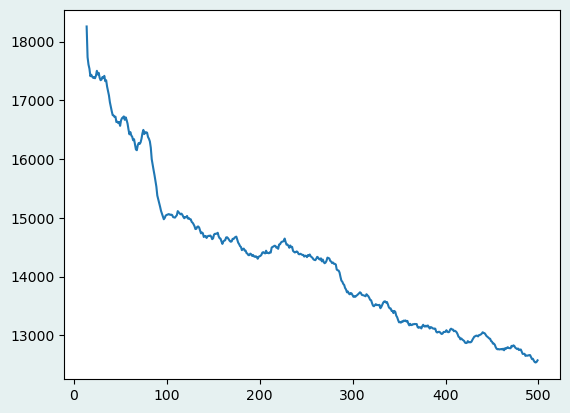

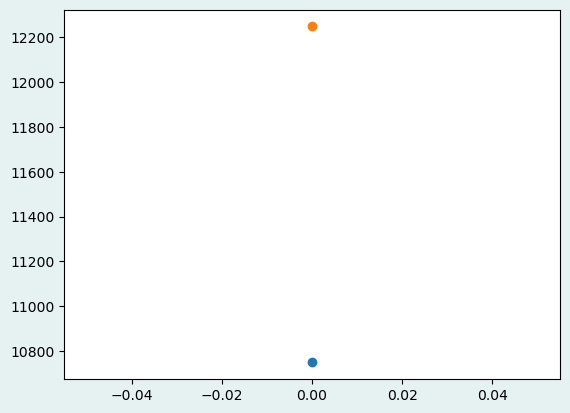

(10749.841612268316, 12247.117587798011)

In [197]:
tr,cv = get_train_cv_error(model,X_train_new,X_cv_new,metric=mean_absolute_error)
plot_history([history],[1])
plt.show()
plt.scatter([0],tr)
plt.scatter([0],cv)
plt.show()
(tr,cv)


In [65]:
model.summary()
y_pred_train = np.array(model.predict(X_train_sc)).flatten()
train_err = mean_squared_error(y_train,y_pred_train)

y_pred_cv = np.array(model.predict(X_cv_sc)).flatten()
cv_err = mean_squared_error(y_cv,y_pred_cv)
print('Train error: {:.2e}'.format(train_err))
print('CV error: {:.2e}'.format(cv_err))
print('Errors\n')
print(y_cv.to_numpy()[:10])
print(y_pred_cv[:10])

# x_data = np.array(X_train['Size'])
# print(X_train['Size'].shape,y_pred_train.shape)
# # y_pred_cv = y_pred_cv.flatten()
# sns.scatterplot(x=x_data,y=y_pred_train,hue=X_train['BHK'])
# plt.show()
# sns.scatterplot(x=x_data,y=y_train,hue=X_train['BHK'])
# plt.scatter(X_cv['BHK'],y_pred_cv,color='red')





Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               640       
                                                                 
 batch_normalization_50 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_51 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_51 (Dropout)        (None, 128)             

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_11/dense_55/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\wikto\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\wikto\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\wikto\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\wikto\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\wikto\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\wikto\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\wikto\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\wikto\AppData\Local\Temp\ipykernel_6072\1467768119.py", line 2, in <module>
      y_pred_train = np.array(model.predict(X_train_sc)).flatten()
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
      return self(x, training=False)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "c:\Users\wikto\anaconda3\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_11/dense_55/Relu'
Matrix size-incompatible: In[0]: [32,8], In[1]: [4,128]
	 [[{{node sequential_11/dense_55/Relu}}]] [Op:__inference_predict_function_1382490]